In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder,MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
df = pd.read_excel('Expanded_Workers_Turnover_Data_1000.xlsx')

In [3]:
df.head()

,ID,Start time,Completion time,Email,Name,Last modified time,Gender,Age,Marital Status,Level of Education,...,Intent to LeaveI frequently think about leaving my current organization.,Intent to LeaveI have explored job opportunities outside my current organization.\n,Intent to LeaveI will likely leave this organization in the next 12 months if the opportunity arises.,Reasons for Potential TurnoverInadequate compensation is a major reason I would consider leaving.\n,Reasons for Potential TurnoverLack of career advancement opportunities is a major reason I would consider leaving.\n,Reasons for Potential TurnoverUnsatisfactory work environment or organizational culture is a major reason I would consider leaving.\n\n,Reasons for Potential TurnoverFamily responsibilities or relocation concerns significantly influence my decision to stay or leave.\n,External Factors The current economic situation in Nigeria affects my decision to stay or leave.,External Factors The availability of better job opportunities in the market would encourage me to change my job.\n,I have left an organization for similar reasons as stated above.
0,13,2025-01-06 11:43:18,2025-01-06 11:48:27,anonymous,NaN,NaN,Male,25 -34 years,Married,HND/BSc/Equivalent,...,5,5,2,1.0,5.0,5.0,1.0,1.0,5.0,Yes
1,49,2025-01-07 08:39:37,2025-01-07 08:45:37,anonymous,NaN,NaN,Male,25 -34 years,Single,HND/BSc/Equivalent,...,3,3,3,3.0,3.0,3.0,4.0,4.0,3.0,No
2,40,2025-01-06 21:55:05,2025-01-06 21:57:19,anonymous,NaN,NaN,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,...,3,2,4,3.0,4.0,5.0,3.0,2.0,5.0,Yes
3,32,2025-01-06 15:58:48,2025-01-06 16:10:24,anonymous,NaN,NaN,Male,Under 25 years,Single,HND/BSc/Equivalent,...,1,1,1,3.0,3.0,3.0,3.0,1.0,1.0,No
4,54,2025-01-07 09:48:06,2025-01-07 10:15:03,anonymous,NaN,NaN,Male,35 -44 years,Single,HND/BSc/Equivalent,...,4,4,4,5.0,5.0,1.0,5.0,5.0,5.0,No


In [4]:
len(df.columns)

40

In [5]:
df.shape

(1000, 40)

### remove all columns that are not by intuition relevant to predicting workers turnover such as start time, completion time, email, name, last modified time

In [6]:
df.pop('Last modified time')
df.pop('Start time')
df.pop('Completion time')
df.pop('Email')
df.pop('Name')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: Name, Length: 1000, dtype: float64

In [7]:
# take a look at all the data again
df.head()

,ID,Gender,Age,Marital Status,Level of Education,Work Experience (in years),Number of Previous Organisation worked for,Current Job Level,Job Security: I feel secure in my current job position.,Job Security: Management clearly communicates policies that ensure job stability.,...,Intent to LeaveI frequently think about leaving my current organization.,Intent to LeaveI have explored job opportunities outside my current organization.\n,Intent to LeaveI will likely leave this organization in the next 12 months if the opportunity arises.,Reasons for Potential TurnoverInadequate compensation is a major reason I would consider leaving.\n,Reasons for Potential TurnoverLack of career advancement opportunities is a major reason I would consider leaving.\n,Reasons for Potential TurnoverUnsatisfactory work environment or organizational culture is a major reason I would consider leaving.\n\n,Reasons for Potential TurnoverFamily responsibilities or relocation concerns significantly influence my decision to stay or leave.\n,External Factors The current economic situation in Nigeria affects my decision to stay or leave.,External Factors The availability of better job opportunities in the market would encourage me to change my job.\n,I have left an organization for similar reasons as stated above.
0,13,Male,25 -34 years,Married,HND/BSc/Equivalent,4 -6 years,3,Senior staff (Levels 7 above),2,2,...,5,5,2,1.0,5.0,5.0,1.0,1.0,5.0,Yes
1,49,Male,25 -34 years,Single,HND/BSc/Equivalent,1 -3 years,1,Senior staff (Levels 7 above),4,4,...,3,3,3,3.0,3.0,3.0,4.0,4.0,3.0,No
2,40,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,1 -3 years,1,Junior staff (Levels 1 -6),3,2,...,3,2,4,3.0,4.0,5.0,3.0,2.0,5.0,Yes
3,32,Male,Under 25 years,Single,HND/BSc/Equivalent,4 -6 years,1,Junior staff (Levels 1 -6),1,1,...,1,1,1,3.0,3.0,3.0,3.0,1.0,1.0,No
4,54,Male,35 -44 years,Single,HND/BSc/Equivalent,4 -6 years,2,Junior staff (Levels 1 -6),1,1,...,4,4,4,5.0,5.0,1.0,5.0,5.0,5.0,No


#### Rename the columns to numbers for easy reading

In [8]:
features = df.columns
df = df.set_axis([i for i in range(len(df.columns))] ,axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,13,Male,25 -34 years,Married,HND/BSc/Equivalent,4 -6 years,3,Senior staff (Levels 7 above),2,2,...,5,5,2,1.0,5.0,5.0,1.0,1.0,5.0,Yes
1,49,Male,25 -34 years,Single,HND/BSc/Equivalent,1 -3 years,1,Senior staff (Levels 7 above),4,4,...,3,3,3,3.0,3.0,3.0,4.0,4.0,3.0,No
2,40,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,1 -3 years,1,Junior staff (Levels 1 -6),3,2,...,3,2,4,3.0,4.0,5.0,3.0,2.0,5.0,Yes
3,32,Male,Under 25 years,Single,HND/BSc/Equivalent,4 -6 years,1,Junior staff (Levels 1 -6),1,1,...,1,1,1,3.0,3.0,3.0,3.0,1.0,1.0,No
4,54,Male,35 -44 years,Single,HND/BSc/Equivalent,4 -6 years,2,Junior staff (Levels 1 -6),1,1,...,4,4,4,5.0,5.0,1.0,5.0,5.0,5.0,No


In [9]:
# drop na values
df=df.dropna()

In [10]:
y= df.pop(34)
X = df

In [11]:
# get all the categorical columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()


In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,13,Male,25 -34 years,Married,HND/BSc/Equivalent,4 -6 years,3,Senior staff (Levels 7 above),2,2,...,1.0,5,5,2,1.0,5.0,5.0,1.0,1.0,5.0
1,49,Male,25 -34 years,Single,HND/BSc/Equivalent,1 -3 years,1,Senior staff (Levels 7 above),4,4,...,4.0,3,3,3,3.0,3.0,3.0,4.0,4.0,3.0
2,40,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,1 -3 years,1,Junior staff (Levels 1 -6),3,2,...,4.0,3,2,4,3.0,4.0,5.0,3.0,2.0,5.0
3,32,Male,Under 25 years,Single,HND/BSc/Equivalent,4 -6 years,1,Junior staff (Levels 1 -6),1,1,...,1.0,1,1,1,3.0,3.0,3.0,3.0,1.0,1.0
4,54,Male,35 -44 years,Single,HND/BSc/Equivalent,4 -6 years,2,Junior staff (Levels 1 -6),1,1,...,4.0,4,4,4,5.0,5.0,1.0,5.0,5.0,5.0


In [13]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: 34, dtype: object

In [14]:
# create a mask to select all the discrete features (integer valued features)
discrete_mask = X.dtypes == int 

In [15]:
# Encode categorical features
encoder = OrdinalEncoder()
X[categorical_features] = encoder.fit_transform(X[categorical_features])

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [16]:
# deal with Nan values
X=X.dropna()

In [17]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y_encoded, discrete_features=discrete_mask)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [18]:
# get mutual information scores to evaluate which features are relevant to predicting
# worker turnover 
mi_scores =make_mi_scores(X,y,discrete_mask)
mi_scores

0     0.693127
29    0.205087
27    0.131680
26    0.107047
30    0.103322
28    0.072237
15    0.068784
16    0.066508
10    0.063624
33    0.063591
5     0.063150
21    0.062576
9     0.038796
8     0.035536
32    0.030026
17    0.029993
6     0.028726
2     0.022387
31    0.020814
12    0.018530
23    0.016147
25    0.009936
14    0.008673
20    0.008640
4     0.007021
1     0.005126
13    0.003092
11    0.002698
22    0.001627
3     0.000000
24    0.000000
19    0.000000
18    0.000000
7     0.000000
Name: MI Scores, dtype: float64

In [19]:
# all see all features with mutual information above 0.04 threshold
THRESH_HOLD = 0.04
mi_scores_above_threshold = mi_scores[mi_scores > THRESH_HOLD ].index.to_list()
mi_scores_above_threshold

[0, 29, 27, 26, 30, 28, 15, 16, 10, 33, 5, 21]

In [20]:
# display the names of columns with mutual information above that threshold
names_of_columns_above_threshold = [ features[i] for i in mi_scores_above_threshold ]

In [21]:
names_of_columns_above_threshold

['ID',
 'Reasons for Potential TurnoverLack of career advancement opportunities is a major reason I would       consider leaving.\n',
 'Intent to LeaveI will likely leave this organization in the next 12 months if the       opportunity arises.',
 'Intent to LeaveI have explored job opportunities outside my current organization.\n',
 'Reasons for Potential TurnoverUnsatisfactory work environment or organizational culture is a       major reason I would consider leaving.\n\n',
 'Reasons for Potential TurnoverInadequate compensation is a major reason I would consider       leaving.\n',
 'Recognition and RewardI am recognized when I preform well\n',
 'Recognition and RewardThe reward system in my organization is fair and transparent.\n',
 'Compensation and Benefits: My\xa0salary is competitive compared to similar positions in other organizations',
 'External Factors  The availability of better job opportunities in the market would encourage me to change my job.\n',
 'Work Experience (in ye

#### From the above result we can see that the following columns have a strong correlation to potential turnover
* Reasons for Potential Turnover: Lack of career advancement opportunities is a major reason I would consider leaving.
* Intent to LeaveI will likely leave this organization in the next 12 months if the opportunity arises.
* Reasons for Potential Turnover Unsatisfactory work environment or organizational culture is a major reason I would consider leaving.
* Compensation and Benefits:     I am satisfied with the non-monetary benefits (e.g., health insurance, pension scheme) offered by my employer. 
* Compensation and Benefits: My salary is competitive compared to similar positions in other organizations.
* Number of Previous Organisation worked for.
* Job Satisfaction: I am satisfied with my current role and responsibilities.  
* Work Experience (in years).
* Job Satisfaction: I am satisfied with my current role and responsibilities.
* Leadership StyleManagement style in my organization motivates me to perform at my best.
* Intent to Leave I have explored job opportunities outside my current organization.
* Recognition and RewardI am recognized when I preform well.
* External Factors  The availability of better job opportunities in the market would encourage me to change my job.
  

### With mutual information we reduced our columns to 12. which are more relevant to predicting employee turnover ( Excluding the worker id column ).

In [22]:
X=X[mi_scores_above_threshold]
# pop the id column ( column 0)
X.pop(0)

0      13
1      49
2      40
3      32
4      54
       ..
995    26
996    58
997    55
998    17
999    39
Name: 0, Length: 787, dtype: int64

In [23]:
X

,29,27,26,30,28,15,16,10,33,5,21
0,5.0,2,5,5.0,1.0,3.0,3.0,3,5.0,1.0,2.0
1,3.0,3,3,3.0,3.0,4.0,3.0,4,3.0,0.0,3.0
2,4.0,4,2,5.0,3.0,4.0,3.0,2,5.0,0.0,4.0
3,3.0,1,1,3.0,3.0,3.0,3.0,1,1.0,1.0,5.0
4,5.0,4,4,1.0,5.0,4.0,3.0,1,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,1,1,1.0,1.0,4.0,4.0,4,5.0,0.0,5.0
996,4.0,4,4,5.0,4.0,1.0,1.0,1,3.0,4.0,3.0
997,1.0,1,2,1.0,1.0,3.0,3.0,4,1.0,4.0,4.0
998,5.0,1,1,4.0,2.0,5.0,5.0,3,1.0,4.0,4.0


<Axes: >

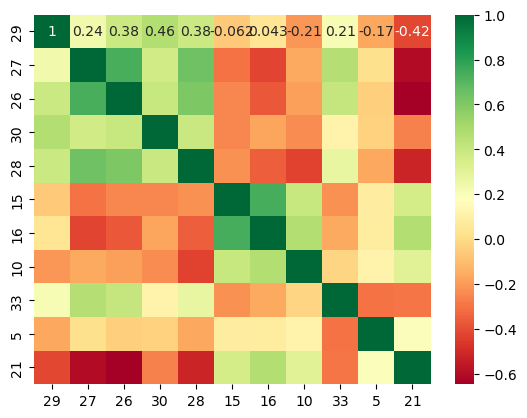

In [24]:
# The heatmap below shows the correlation between the variables themselves
sns.heatmap(X.corr(),cmap="RdYlGn",annot=True)

In [25]:
# create the scaler ( The scaler is responsible for scaling all the variables to the range of 0 -> 1)
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()
# scale the inputs to be in the range of 0 -> 1
scaled_x = input_scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y_encoded, test_size=0.2, random_state=42)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [27]:
from tabpfn import TabPFNClassifier
# create the tabPFN classifier
classifier = TabPFNClassifier(device='cpu', 
                              )

In [28]:
classifier.fit(X_train, y_train)
classifier.predict(y_test,)

: 